<a href="https://colab.research.google.com/github/hhh6593/TIL/blob/master/get_image_file_pr2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [6]:
!ls

light_intel.zip  Untitled.ipynb


In [7]:
!unzip light_intel.zip

Archive:  light_intel.zip
  inflating: seg_test/buildings/20057.jpg  
  inflating: seg_test/buildings/20060.jpg  
  inflating: seg_test/buildings/20061.jpg  
  inflating: seg_test/buildings/20064.jpg  
  inflating: seg_test/buildings/20073.jpg  
  inflating: seg_test/buildings/20074.jpg  
  inflating: seg_test/buildings/20078.jpg  
  inflating: seg_test/buildings/20083.jpg  
  inflating: seg_test/buildings/20094.jpg  
  inflating: seg_test/buildings/20096.jpg  
  inflating: seg_test/buildings/20113.jpg  
  inflating: seg_test/buildings/20131.jpg  
  inflating: seg_test/buildings/20140.jpg  
  inflating: seg_test/buildings/20177.jpg  
  inflating: seg_test/buildings/20186.jpg  
  inflating: seg_test/buildings/20206.jpg  
  inflating: seg_test/buildings/20207.jpg  
  inflating: seg_test/buildings/20218.jpg  
  inflating: seg_test/buildings/20228.jpg  
  inflating: seg_test/buildings/20231.jpg  
  inflating: seg_test/buildings/20241.jpg  
  inflating: seg_test/buildings/20245.jpg  
  infl

In [15]:
!ls '/content/drive/My Drive/Colab Notebooks/seg_train'

buildings  forest  glacier  mountain  sea  street


In [18]:
train_path = '/content/drive/My Drive/Colab Notebooks/seg_train'
test_path = '/content/drive/My Drive/Colab Notebooks/seg_test'

In [44]:
batch_size=32
img_height=180
img_width=180

In [51]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3000 files belonging to 6 classes.


In [52]:
val_ds = keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 600 files belonging to 6 classes.


In [55]:
class_names=train_ds.class_names

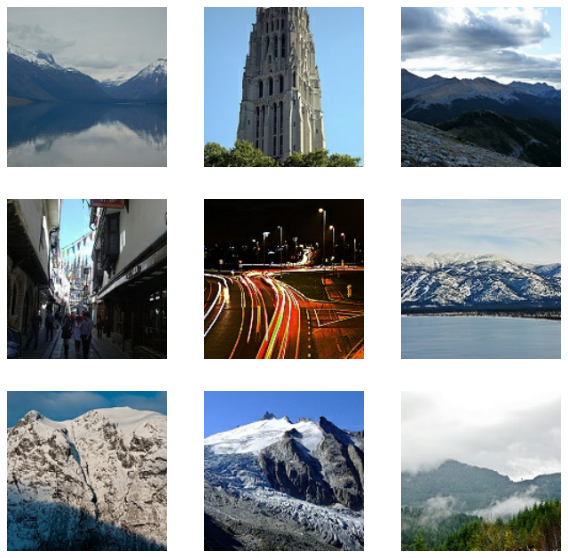

In [56]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))  #numpy() - tensor 행렬을  numpy행렬로 변환,uint8(0~255)
        plt.axis('off')

In [57]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [58]:
from tensorflow.keras import layers
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [59]:
normalization_layer

In [61]:
import numpy as np
normalization_ds = train_ds.map(lambda x,y : (normalization_layer(x),y))
image_batch, labels_batch = next(iter(normalization_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.00049021107 1.0


In [64]:
auto = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=auto)
val_ds = val_ds.cache().prefetch(buffer_size=auto)

In [65]:
train_ds

<PrefetchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>